<a href="https://colab.research.google.com/github/girishthorat/Forecasting/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
#drive.mount('/gdrive')
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install neuralprophet[live]


     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 76 kB 3.5 MB/s 
     |████████████████████████████████| 748.8 MB 18 kB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.10.0+cu102 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0 which is incompatible.


In [ ]:
from sklearn.feature_extraction import FeatureHasher


In [ ]:
import pandas as pd
import numpy as np
from neuralprophet import NeuralProphet
from fbprophet import Prophet
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
import category_encoders as ce


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Time_Series/train.csv')

In [ ]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [ ]:
df['date'].value_counts()

2015-03-21    500
2015-03-25    500
2017-05-28    500
2015-08-15    500
2013-01-08    500
             ... 
2016-03-07    500
2016-06-17    500
2017-09-10    500
2017-05-07    500
2017-08-14    500
Name: date, Length: 1826, dtype: int64

In [ ]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [ ]:
df['date'] = pd.to_datetime(df['date'])
#df[['item','store']] = df[['item','store']].astype(str)


In [ ]:
df['item'].value_counts()

40    18260
17    18260
8     18260
2     18260
19    18260
34    18260
23    18260
5     18260
41    18260
3     18260
42    18260
49    18260
18    18260
24    18260
28    18260
33    18260
44    18260
10    18260
15    18260
35    18260
25    18260
21    18260
32    18260
38    18260
12    18260
27    18260
43    18260
7     18260
1     18260
46    18260
11    18260
36    18260
22    18260
26    18260
31    18260
50    18260
4     18260
47    18260
48    18260
45    18260
37    18260
6     18260
39    18260
30    18260
13    18260
20    18260
16    18260
29    18260
9     18260
14    18260
Name: item, dtype: int64

In [ ]:
df=(df.loc[(df['item']==1) & (df['store']==5)])

In [ ]:
df=df.reset_index(drop=True)


In [ ]:
df

,date,store,item,sales
0,2013-01-01,5,1,11
1,2013-01-02,5,1,9
2,2013-01-03,5,1,12
3,2013-01-04,5,1,8
4,2013-01-05,5,1,13
...,...,...,...,...
1821,2017-12-27,5,1,15
1822,2017-12-28,5,1,13
1823,2017-12-29,5,1,18
1824,2017-12-30,5,1,19


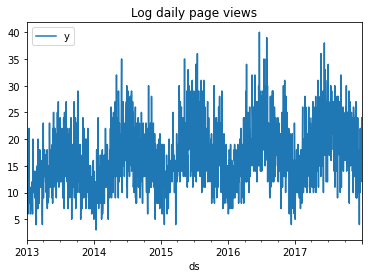

In [ ]:
df.plot(x='ds', y='y', title='Log daily page views')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb6f96eed0>,
      dtype=object)

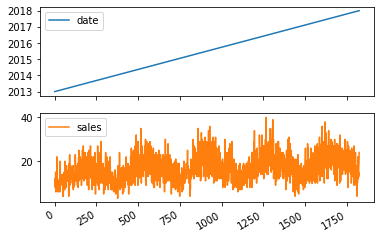

In [ ]:
df.plot(subplots=True)

In [ ]:
df.drop(['store','item'], axis = 1,inplace=True)

In [ ]:
df.columns= ['ds','y']

In [ ]:
df

,ds,y
0,2013-01-01,11
1,2013-01-02,9
2,2013-01-03,12
3,2013-01-04,8
4,2013-01-05,13
...,...,...
1821,2017-12-27,15
1822,2017-12-28,13
1823,2017-12-29,18
1824,2017-12-30,19


In [ ]:
fig = px.line(df, x='ds', y='y',
              title='Sales')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
                      dict(count=1, label='1y', step='year', stepmode='backward'),
                      dict(count=2, label='3y', step='year', stepmode='backward'),
                      dict(count=3, label='5y', step='year', stepmode='backward')
        ])
    )
)
fig.show()

In [ ]:
df['ds'].value_counts()

2016-11-14    1
2017-08-28    1
2016-12-11    1
2016-04-07    1
2017-05-29    1
             ..
2015-12-20    1
2017-02-09    1
2013-01-02    1
2014-02-23    1
2014-01-24    1
Name: ds, Length: 1826, dtype: int64

In [ ]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [ ]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(df)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2017-12-27,13.975821,5.258560,22.012360
1822,2017-12-28,14.878655,7.000273,23.138425
1823,2017-12-29,15.855877,7.767497,23.671948
1824,2017-12-30,16.984730,9.030641,25.850124
1825,2017-12-31,18.040026,9.990258,26.251984


In [ ]:
df.head()

,ds,y
0,2013-01-01,11
1,2013-01-02,9
2,2013-01-03,12
3,2013-01-04,8
4,2013-01-05,13


In [ ]:
df.tail()

,ds,y
1821,2017-12-27,15
1822,2017-12-28,13
1823,2017-12-29,18
1824,2017-12-30,19
1825,2017-12-31,24


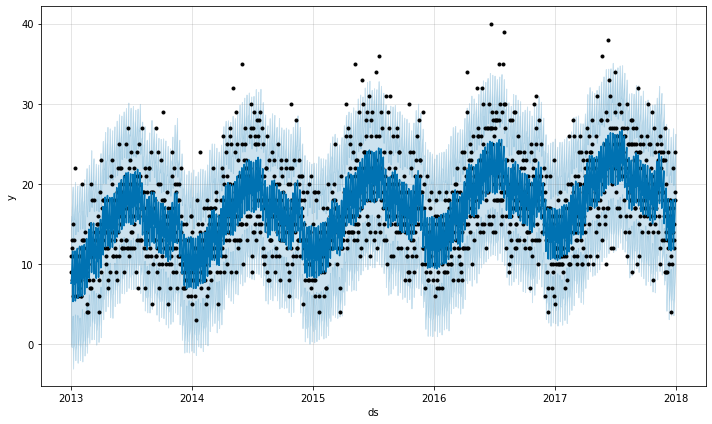

In [ ]:
fig1 = model.plot(forecast)

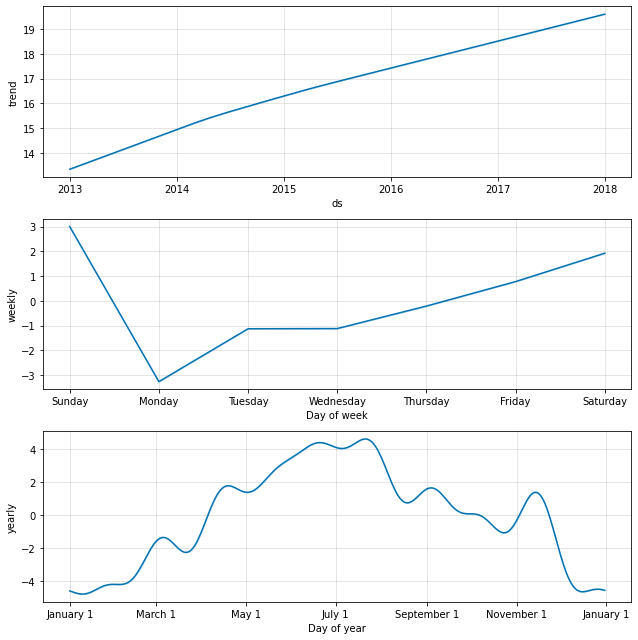

In [ ]:
fig2 = model.plot_components(forecast)

In [ ]:
test=df[df['ds']>'2017-01-01']

In [ ]:
train=df[df['ds']<='2017-01-01']

In [ ]:
model = Prophet(interval_width=0.95, yearly_seasonality=True)

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast = model.predict(test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
359,2017-12-27,14.039613,5.287298,21.665511
360,2017-12-28,14.933648,6.613925,22.558418
361,2017-12-29,16.259582,8.224648,24.026106
362,2017-12-30,16.941873,8.469840,24.776310
363,2017-12-31,18.230613,10.172206,26.057157


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-02,10.759300,2.963904,19.398676
1,2017-01-03,12.927081,4.825873,21.591203
2,2017-01-04,12.733682,4.620821,21.063670
3,2017-01-05,13.637370,5.726708,21.738087
4,2017-01-06,14.983720,7.058279,22.978937
...,...,...,...,...
359,2017-12-27,14.039613,5.287298,21.665511
360,2017-12-28,14.933648,6.613925,22.558418
361,2017-12-29,16.259582,8.224648,24.026106
362,2017-12-30,16.941873,8.469840,24.776310


In [ ]:
test=test.reset_index(drop=True)


In [ ]:
test

,ds,y
0,2017-01-02,5
1,2017-01-03,10
2,2017-01-04,12
3,2017-01-05,12
4,2017-01-06,11
...,...,...
359,2017-12-27,15
360,2017-12-28,13
361,2017-12-29,18
362,2017-12-30,19


In [ ]:
sum(abs(test['y']-forecast['yhat'])/test['y'])

79.23903783901903

In [ ]:
sum(abs(test['y']-forecast['yhat'])/test['y'])/364

0.21768966439290943

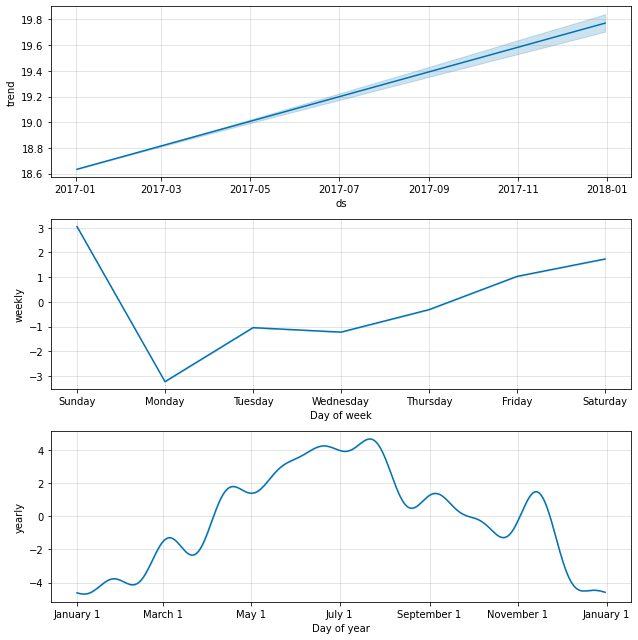

In [ ]:
fig2 = model.plot_components(forecast)

# Neural Prophet

In [ ]:
df

,ds,y
0,2013-01-01,11
1,2013-01-02,9
2,2013-01-03,12
3,2013-01-04,8
4,2013-01-05,13
...,...,...
1821,2017-12-27,15
1822,2017-12-28,13
1823,2017-12-29,18
1824,2017-12-30,19


In [ ]:
nprophet_model = NeuralProphet()
metrics = nprophet_model.fit(train, freq="D")
future_df = nprophet_model.make_future_dataframe(train, periods = 364, n_historic_predictions=0)
preds_df_2 = nprophet_model.predict(future_df)

INFO: nprophet.utils - set_auto_seasonalities: Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO: nprophet.config - set_auto_batch_epoch: Auto-set batch_size to 32
INFO: nprophet.config - set_auto_batch_epoch: Auto-set epochs to 43


  0%|          | 0/100 [00:00<?, ?it/s]

INFO: nprophet - _lr_range_test: learning rate range test found optimal lr: 5.34E-01
Epoch[43/43]: 100%|██████████| 43/43 [00:03<00:00, 11.07it/s, SmoothL1Loss=0.0127, MAE=3.29, RegLoss=0]


In [ ]:
preds_df_2

,ds,y,yhat1,residual1,trend,season_yearly,season_weekly
0,2017-01-02,None,9.886389,None,18.398842,-5.262212,-3.250242
1,2017-01-03,None,11.936367,None,18.401682,-5.241551,-1.223765
2,2017-01-04,None,12.089993,None,18.404524,-5.214117,-1.100413
3,2017-01-05,None,13.023985,None,18.407364,-5.180435,-0.202945
4,2017-01-06,None,14.120139,None,18.410204,-5.141045,0.850980
...,...,...,...,...,...,...,...
359,2017-12-27,None,13.108638,None,19.418657,-5.209607,-1.100413
360,2017-12-28,None,13.977358,None,19.421499,-5.241196,-0.202945
361,2017-12-29,None,15.011828,None,19.424339,-5.263490,0.850980
362,2017-12-30,None,16.156986,None,19.427179,-5.276781,2.006588


In [ ]:
future_df

,ds,y,t,y_scaled
0,2017-01-02,None,1.000684,None
1,2017-01-03,None,1.001369,None
2,2017-01-04,None,1.002053,None
3,2017-01-05,None,1.002738,None
4,2017-01-06,None,1.003422,None
...,...,...,...,...
359,2017-12-27,None,1.246407,None
360,2017-12-28,None,1.247091,None
361,2017-12-29,None,1.247775,None
362,2017-12-30,None,1.248460,None


In [ ]:
df.tail()

,ds,y
1821,2017-12-27,15
1822,2017-12-28,13
1823,2017-12-29,18
1824,2017-12-30,19
1825,2017-12-31,24


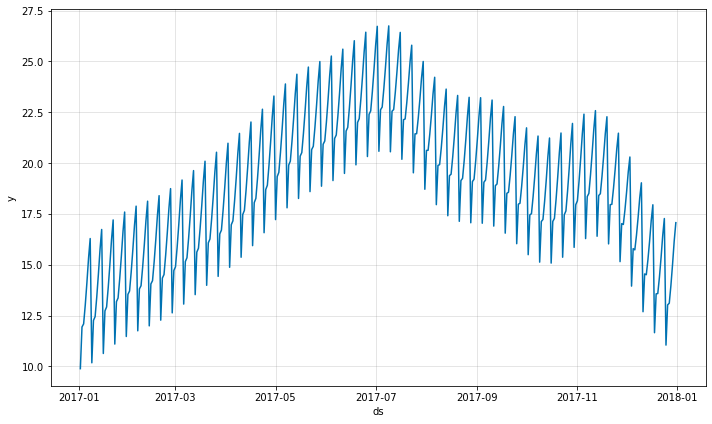

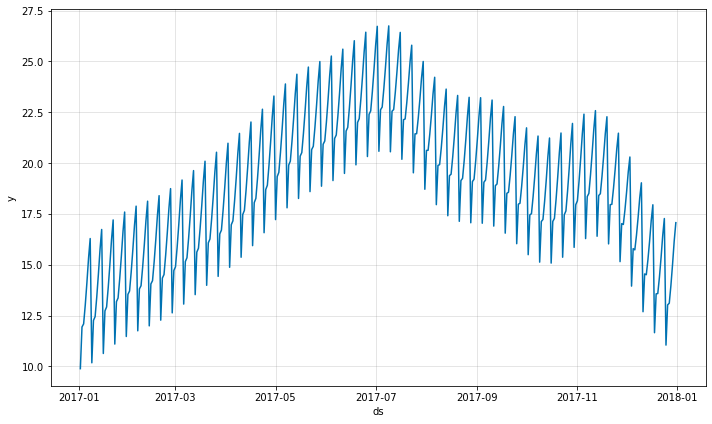

In [ ]:
nprophet_model.plot(preds_df_2)

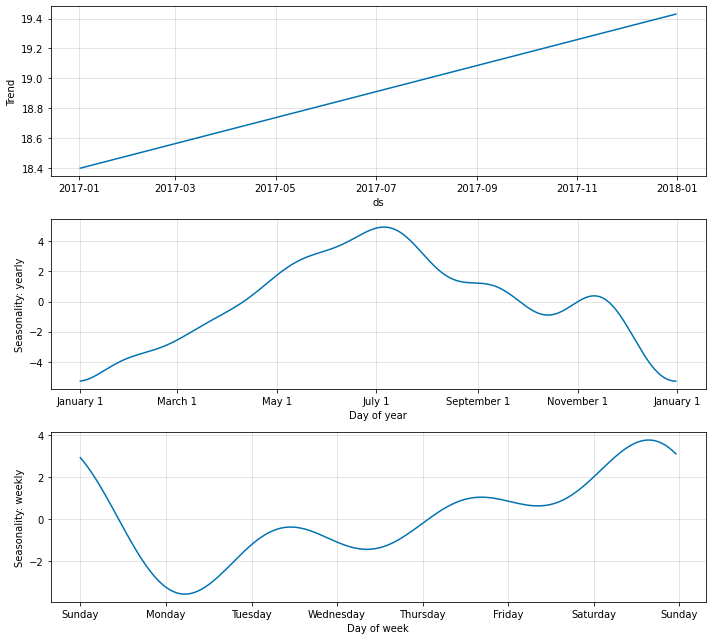

In [ ]:
nprophet_model.plot_components(preds_df_2, residuals=True);


In [ ]:
test

,ds,y
0,2017-01-02,5
1,2017-01-03,10
2,2017-01-04,12
3,2017-01-05,12
4,2017-01-06,11
...,...,...
359,2017-12-27,15
360,2017-12-28,13
361,2017-12-29,18
362,2017-12-30,19


In [ ]:
sum(abs(test['y']-preds_df_2['yhat1'])/test['y'])/364

0.21294435444884244